In [13]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


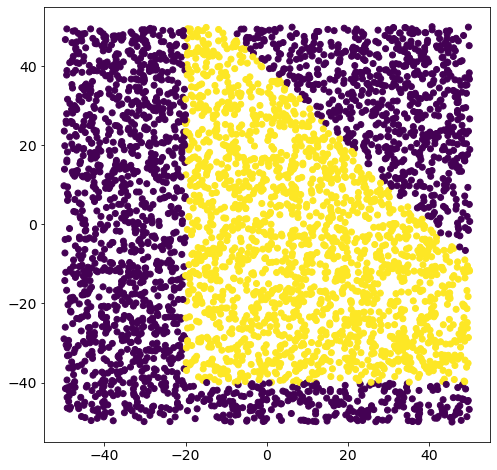

In [14]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

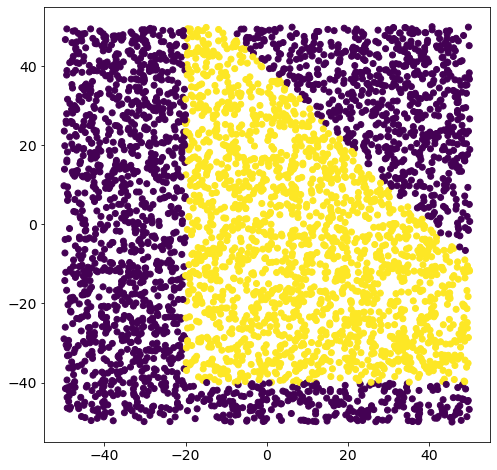

In [16]:
#keras work with numpy arrays: just use them from the start
TYPE=1
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [17]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [18]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.09854886 -1.02696928]
 [ 0.23239757  0.32886942]
 [ 1.60836682  0.52872451]
 ...
 [-1.71033821 -0.58010476]
 [ 0.45209286 -0.58910521]
 [ 1.55988736  0.94632066]]


In [19]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='elu'))
    model.add(Dense(20,activation='elu'))
    model.add(Dense(20,activation='elu'))
    model.add(Dense(20,activation='elu'))
    model.add(Dense(20,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=200
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 20)                60        
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [20]:
model.compile(loss='binary_crossentropy',
               #optimizer="RMSprop",
               optimizer='Nadam',
               metrics=['accuracy'])

In [21]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/200
36/36 - 1s - loss: 0.7024 - accuracy: 0.5369 - val_loss: 0.6571 - val_accuracy: 0.6062 - 1s/epoch - 39ms/step
Epoch 2/200
36/36 - 0s - loss: 0.6612 - accuracy: 0.6069 - val_loss: 0.6406 - val_accuracy: 0.6225 - 103ms/epoch - 3ms/step
Epoch 3/200
36/36 - 0s - loss: 0.6408 - accuracy: 0.6381 - val_loss: 0.6156 - val_accuracy: 0.6562 - 102ms/epoch - 3ms/step
Epoch 4/200
36/36 - 0s - loss: 0.6007 - accuracy: 0.7334 - val_loss: 0.5684 - val_accuracy: 0.7625 - 98ms/epoch - 3ms/step
Epoch 5/200
36/36 - 0s - loss: 0.5342 - accuracy: 0.7778 - val_loss: 0.5155 - val_accuracy: 0.7650 - 100ms/epoch - 3ms/step
Epoch 6/200
36/36 - 0s - loss: 0.4674 - accuracy: 0.7922 - val_loss: 0.4455 - val_accuracy: 0.7875 - 105ms/epoch - 3ms/step
Epoch 7/200
36/36 - 0s - loss: 0.4213 - accuracy: 0.8022 - val_loss: 0.4074 - val_accuracy: 0.8075 - 103ms/epoch - 3ms/step
Epoch 8/200
36/36 - 0s - loss: 0.3890 - accuracy: 0.8166 - val_loss: 0.3825 - val_accuracy: 0.8188 - 99ms/epoch - 3ms/step
Epoch 9/200


Epoch 67/200
36/36 - 0s - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0215 - val_accuracy: 0.9912 - 98ms/epoch - 3ms/step
Epoch 68/200
36/36 - 0s - loss: 0.0275 - accuracy: 0.9887 - val_loss: 0.0416 - val_accuracy: 0.9812 - 97ms/epoch - 3ms/step
Epoch 69/200
36/36 - 0s - loss: 0.0285 - accuracy: 0.9881 - val_loss: 0.0294 - val_accuracy: 0.9862 - 110ms/epoch - 3ms/step
Epoch 70/200
36/36 - 0s - loss: 0.0258 - accuracy: 0.9900 - val_loss: 0.0353 - val_accuracy: 0.9900 - 96ms/epoch - 3ms/step
Epoch 71/200
36/36 - 0s - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.0315 - val_accuracy: 0.9875 - 95ms/epoch - 3ms/step
Epoch 72/200
36/36 - 0s - loss: 0.0261 - accuracy: 0.9891 - val_loss: 0.0191 - val_accuracy: 0.9912 - 98ms/epoch - 3ms/step
Epoch 73/200
36/36 - 0s - loss: 0.0304 - accuracy: 0.9881 - val_loss: 0.0195 - val_accuracy: 0.9912 - 97ms/epoch - 3ms/step
Epoch 74/200
36/36 - 0s - loss: 0.0307 - accuracy: 0.9887 - val_loss: 0.0360 - val_accuracy: 0.9875 - 122ms/epoch - 3ms/step
Epoch 

Epoch 133/200
36/36 - 0s - loss: 0.0199 - accuracy: 0.9922 - val_loss: 0.0389 - val_accuracy: 0.9850 - 100ms/epoch - 3ms/step
Epoch 134/200
36/36 - 0s - loss: 0.0196 - accuracy: 0.9916 - val_loss: 0.0294 - val_accuracy: 0.9912 - 102ms/epoch - 3ms/step
Epoch 135/200
36/36 - 0s - loss: 0.0231 - accuracy: 0.9903 - val_loss: 0.0459 - val_accuracy: 0.9887 - 106ms/epoch - 3ms/step
Epoch 136/200
36/36 - 0s - loss: 0.0216 - accuracy: 0.9912 - val_loss: 0.0622 - val_accuracy: 0.9800 - 104ms/epoch - 3ms/step
Epoch 137/200
36/36 - 0s - loss: 0.0224 - accuracy: 0.9903 - val_loss: 0.0184 - val_accuracy: 0.9925 - 98ms/epoch - 3ms/step
Epoch 138/200
36/36 - 0s - loss: 0.0197 - accuracy: 0.9919 - val_loss: 0.0165 - val_accuracy: 0.9925 - 101ms/epoch - 3ms/step
Epoch 139/200
36/36 - 0s - loss: 0.0186 - accuracy: 0.9925 - val_loss: 0.0277 - val_accuracy: 0.9900 - 100ms/epoch - 3ms/step
Epoch 140/200
36/36 - 0s - loss: 0.0202 - accuracy: 0.9906 - val_loss: 0.0102 - val_accuracy: 0.9962 - 111ms/epoch - 3m

36/36 - 0s - loss: 0.0185 - accuracy: 0.9909 - val_loss: 0.0509 - val_accuracy: 0.9862 - 107ms/epoch - 3ms/step
Epoch 199/200
36/36 - 0s - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0222 - val_accuracy: 0.9925 - 100ms/epoch - 3ms/step
Epoch 200/200
36/36 - 0s - loss: 0.0222 - accuracy: 0.9891 - val_loss: 0.0187 - val_accuracy: 0.9937 - 103ms/epoch - 3ms/step


[0.022162316367030144, 0.018671531230211258]


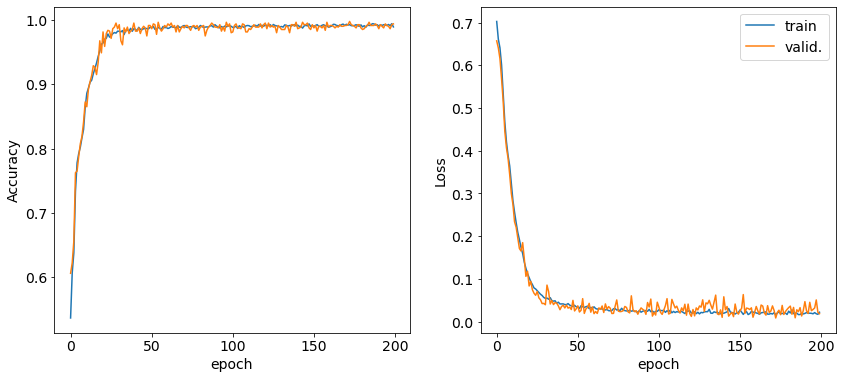

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)
plt.savefig('LC_1F_2G.png')

In [23]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
print(grid_r)
pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-1.73132788 -1.73132788]
 [-1.66207477 -1.73132788]
 [-1.59282165 -1.73132788]
 ...
 [ 1.59282165  1.73132788]
 [ 1.66207477  1.73132788]
 [ 1.73132788  1.73132788]]


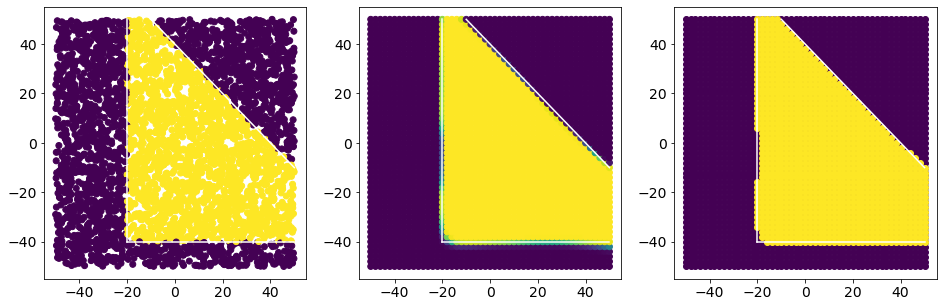

In [24]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('1F_2G.png')